### 한글텍스트 분류

In [1]:
import pandas as pd
train = pd.read_csv('Data/ratings_train.csv', encoding='ms949')
test = pd.read_csv('Data/ratings_test.csv', encoding='ms949')
len(train), len(test), train[:3], test[:3]

(150000,
 50000,
                             document  label
 0                아 더빙.. 진짜 짜증나네요 목소리      0
 1  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
 2                  너무재밓었다그래서보는것을추천한다      0,
                                  document  label
 0                                     굳 ㅋ      1
 1                    GDNTOPCLASSINTHECLUB      0
 2  뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0)

In [2]:
train['document'].nunique(), train['label'].nunique()     # 중복되지 않은 데이터 확인, 4000개?

(146157, 2)

In [3]:
len(train) - train['document'].nunique()    # 중복값 약 4000개

3843

In [4]:
#중복값 제거

train.drop_duplicates(subset=['document'], inplace=True)
len(train)

146158

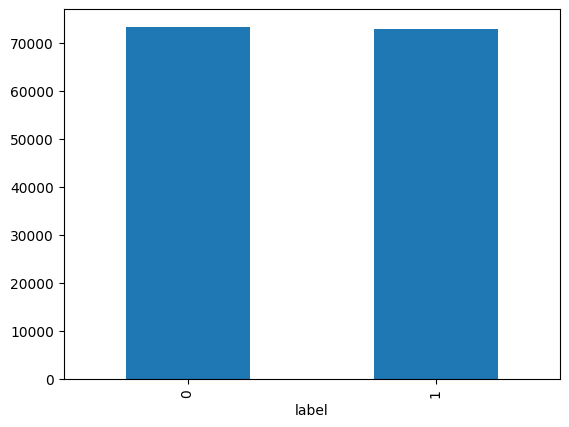

In [5]:
import matplotlib.pyplot as plt

train['label'].value_counts().plot(kind = 'bar')
plt.show()

In [6]:
train.loc[train.document.isnull()]

,document,label
25857,NaN,1


In [7]:
train = train.dropna(how = 'any') # Null 값이 존재하는 행 제거
train.isnull().values.any()

False

In [8]:
train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")
train[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [9]:
import numpy as np

# 공백제거
train['document'] = train['document'].str.replace('^ +', "")
train['document'].replace('',np.nan, inplace=True)
train.isnull().sum()

document    0
label       0
dtype: int64

In [10]:
train.loc[train.document.isnull()][:3]

,document,label


In [11]:
train = train.dropna(how = 'any')
len(train)

146157

In [12]:
# test data에도 동일한 과정 적용
test.drop_duplicates(subset = ['document'], inplace=True)
test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['document'] = test['document'].str.replace('^ +', "")
test['document'].replace('', np.nan, inplace=True)
test = test.dropna(how='any')
len(test)

49147

In [13]:
# 불용어 사전
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [14]:
from konlpy.tag import Okt
okt = Okt()
x_train = []

# 형태소분석
# for sentence in train['document']
for sentence in train['document'][:10000]:   # 10000개만 해봄
    temp_x = okt.morphs(sentence, stem=True)   # tokenizing
    temp_x = [word for word in temp_x if not word in stopwords]  #  불용어제거
    x_train.append(temp_x)
x_train[:3]

[['아', '더빙', '..', '진짜', '짜증나다', '목소리'],
 ['흠',
  '...',
  '포스터',
  '보고',
  '초딩',
  '영화',
  '줄',
  '....',
  '오버',
  '연기',
  '조차',
  '가볍다',
  '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]

In [15]:
# test data tokenizing

x_test = []
# 형태소분석
# for sentence in test['document']
for sentence in test['document'][:10000]:   # 10000개만 해봄
    temp_x = okt.morphs(sentence, stem=True)   # tokenizing
    temp_x = [word for word in temp_x if not word in stopwords]  #  불용어제거
    x_test.append(temp_x)
x_test[:3]

[['굳다', 'ㅋ'],
 ['GDNTOPCLASSINTHECLUB'],
 ['뭐', '야', '평점', '....', '나쁘다', '않다', '10', '점', '짜다', '리', '더', '더욱', '아니다']]

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
tokenizer.word_index

{'.': 1,
 '영화': 2,
 '보다': 3,
 '..': 4,
 '을': 5,
 '...': 6,
 ',': 7,
 '없다': 8,
 '이다': 9,
 '있다': 10,
 '?': 11,
 '좋다': 12,
 '다': 13,
 '정말': 14,
 '너무': 15,
 '재밌다': 16,
 '만': 17,
 '적': 18,
 '같다': 19,
 '되다': 20,
 '진짜': 21,
 '점': 22,
 '아니다': 23,
 '!': 24,
 '로': 25,
 '않다': 26,
 '에서': 27,
 '나오다': 28,
 '연기': 29,
 '만들다': 30,
 '평점': 31,
 '것': 32,
 '최고': 33,
 '나': 34,
 '인': 35,
 '안': 36,
 '~': 37,
 '그': 38,
 '내': 39,
 '못': 40,
 '....': 41,
 '스토리': 42,
 '사람': 43,
 '1': 44,
 '드라마': 45,
 '왜': 46,
 '게': 47,
 '보고': 48,
 '고': 49,
 '생각': 50,
 '감동': 51,
 '이렇다': 52,
 'ㅋㅋ': 53,
 '감독': 54,
 '말': 55,
 '때': 56,
 '아깝다': 57,
 '그냥': 58,
 '아': 59,
 '배우': 60,
 '더': 61,
 '거': 62,
 '내용': 63,
 '요': 64,
 '재미없다': 65,
 '재미': 66,
 '지루하다': 67,
 '하고': 68,
 '재미있다': 69,
 '시간': 70,
 '!!': 71,
 '중': 72,
 '가다': 73,
 '자다': 74,
 '뭐': 75,
 '주다': 76,
 '까지': 77,
 '모르다': 78,
 '들다': 79,
 '10': 80,
 '작품': 81,
 '쓰레기': 82,
 '네': 83,
 '알다': 84,
 '수': 85,
 '하나': 86,
 '싶다': 87,
 '사랑': 88,
 '지': 89,
 '이건': 90,
 '그렇다': 91,
 '볼': 92,
 '액션': 93,


In [17]:
len(tokenizer.word_counts.items())

13345

In [18]:
# 출현빈도가 3회 미만인 단어
threshold = 3
total_cnt = len(tokenizer.word_index)    # 단어수
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print(total_cnt)  # 전체단어집합크기
print(rare_cnt)  # 희귀단어수

13345
8891


In [19]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4455


In [20]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(x_train)   # 텍스트를 숫자 시퀀스로 변환
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [21]:
x_test

[[1333, 96],
 [],
 [75, 157, 31, 41, 605, 26, 80, 22, 358, 1594, 61, 1054, 23],
 [67, 26, 112, 352, 123, 6, 107, 76, 197, 285, 41],
 [122,
  682,
  17,
  23,
  124,
  1858,
  100,
  76,
  4,
  46,
  122,
  682,
  25,
  28,
  237,
  723,
  203],
 [266, 20, 7, 33, 266, 2],
 [853, 82],
 [1420, 488, 332, 27, 8, 1339, 3998, 1735, 7, 3817],
 [525,
  1296,
  20,
  1893,
  204,
  63,
  8,
  862,
  212,
  55,
  120,
  2206,
  204,
  541,
  59,
  530,
  19,
  2,
  90,
  122,
  458,
  59,
  9],
 [1898, 1208, 623, 513, 3279, 3175, 7, 210, 43, 91, 26, 4],
 [150, 351, 17, 384, 64],
 [298, 1231, 1283, 521, 720, 20, 698, 20],
 [960, 153, 38, 153, 270, 5, 498, 1, 153, 270, 5, 74, 1141, 153, 19, 2, 9, 1],
 [279, 304, 241, 9, 2, 341, 1079, 26, 1],
 [371,
  42,
  7,
  104,
  7,
  29,
  7,
  3329,
  2099,
  634,
  2,
  1394,
  942,
  120,
  2,
  174,
  796,
  5,
  482,
  1,
  52,
  2,
  251,
  54,
  337,
  39,
  2,
  362,
  267,
  137,
  39,
  2,
  19,
  296],
 [1192, 1483, 31, 75, 202, 11],
 [33],
 [485, 

In [22]:
x_train

[[59, 724, 4, 21, 259, 831],
 [725, 6, 378, 48, 678, 2, 178, 41, 1928, 29, 942, 769, 26],
 [373, 1613, 3462, 3, 249, 13],
 [126, 4, 226, 66, 8, 4, 31, 2848],
 [1389, 38, 29, 943, 2, 24, 1107, 27, 1481, 304, 1000, 293, 304],
 [804,
  3463,
  1001,
  1002,
  122,
  379,
  143,
  1314,
  44,
  1315,
  594,
  250,
  2,
  1,
  115,
  6,
  124,
  898,
  57,
  270,
  1],
 [317, 340, 5, 388, 524, 1],
 [124,
  898,
  57,
  288,
  28,
  318,
  106,
  1760,
  362,
  699,
  245,
  4,
  14,
  621,
  25,
  582,
  656,
  412,
  478,
  2849,
  1,
  17,
  1108,
  1108,
  4,
  45,
  299,
  8,
  29,
  40,
  43,
  17,
  770,
  944,
  83],
 [93, 8, 66, 10, 362, 120, 2],
 [1614, 31, 246, 11, 583, 92, 17, 450, 4, 1482, 402, 622, 15, 10, 11],
 [217, 9, 1, 21, 217, 9, 440],
 [1003, 451, 1109, 206, 771, 945, 2136, 772, 71, 743, 1615, 899, 2429, 9, 37],
 [2137, 156, 900, 49, 56, 1110, 355, 1059, 657, 29, 1175, 40],
 [2850,
  1254,
  12,
  1,
  832,
  1483,
  106,
  901,
  1176,
  3,
  3,
  1390,
  3464,
  1,
  3

In [23]:
import joblib
joblib.dump(tokenizer, 'Data/result/tokenizer.h5')
print(x_train[:3])

[[59, 724, 4, 21, 259, 831], [725, 6, 378, 48, 678, 2, 178, 41, 1928, 29, 942, 769, 26], [373, 1613, 3462, 3, 249, 13]]


In [24]:
y_train = np.array(train['label'][:10000])
y_test = np.array(test['label'][:10000])
max_len = max(len(l) for l in x_train)   # 리뷰 최대길이
max_len

59

In [25]:
cnt = 0
for s in x_train:
    if (len(s)<= 30):
        cnt += 1
# 길이 30 이하인 샘플의 비율
(cnt / len(x_train)) * 100

93.58

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)


In [27]:
x_train[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   59,  724,
           4,   21,  259,  831],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  725,    6,  378,   48,  678,    2,  178,   41, 1928,
          29,  942,  769,   26],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,   

In [28]:
len(x_train), len(y_train), len(x_test), len(y_test)

(10000, 10000, 10000, 10000)

In [29]:
# x_train = x_train[:10000]

In [30]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         445500    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 562877 (2.15 MB)
Trainable params: 562877 (2.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)
mc = ModelCheckpoint('Data/result/RNN_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only=True)
### 저장이 안 됨  ::: val_acc 를 val_accuracy로 바꿔서 실행해야 함
model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.2, callbacks = [es, mc])


125/125 [==============================] - 8s 49ms/step - loss: 0.6198 - accuracy: 0.6572 - val_loss: 0.6055 - val_accuracy: 0.6960


In [32]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)
mc = ModelCheckpoint('Data/result/RNN_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only=True)

model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.2, callbacks = [es, mc])

124/125 [============================>.] - ETA: 0s - loss: 0.4194 - accuracy: 0.8114
Epoch 1: val_accuracy improved from -inf to 0.79300, saving model to Data/result\RNN_model.h5
125/125 [==============================] - 6s 47ms/step - loss: 0.4196 - accuracy: 0.8112 - val_loss: 0.4355 - val_accuracy: 0.7930


c:\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
loaded_model = load_model('Data/result/RNN_model.h5')
loaded_model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.4339 - accuracy: 0.7963


[0.43386274576187134, 0.7962999939918518]

In [34]:
def review_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem = True)   # tokenizing
    new_sentence = [word for word in new_sentence if not word in stopwords]   # 불용어제거
    encoded = tokenizer.texts_to_sequences([new_sentence])   # 정수인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len)    # 패딩
    score = float(model.predict(pad_new))   # 예측
    if (score>0.5):
        print(f'{score * 100:.2f}% 확률로 긍정리뷰입니다 \n')
    else:
        print(f'{(1-score) * 100:.2f}% 확률로 긍정리뷰입니다 \n')
        

In [35]:
review_predict('연기는 잔잔하게 볼 만 합니다')
review_predict('영화의 주제가 뭔지 모르겠음')
review_predict('익살스런 연기가 돋보였던 영화')
review_predict('기대보다는 스토리가 큰 감흥은 없습니다')

1/1 [==============================] - 0s 328ms/step
69.61% 확률로 긍정리뷰입니다 

1/1 [==============================] - 0s 17ms/step
69.35% 확률로 긍정리뷰입니다 

1/1 [==============================] - 0s 17ms/step
65.90% 확률로 긍정리뷰입니다 

1/1 [==============================] - 0s 17ms/step
93.25% 확률로 긍정리뷰입니다 

